### Install Ultralytics package

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 6.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [ ]:
%cd /content/drive/MyDrive/Thesis_2024/yolo

/content/drive/MyDrive/Thesis_2024/yolo


## DETECT

### Training Yolov8n detection
I train this model by using yolov8n, 50 epochs and imgsz is 640

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data= /content/drive/MyDrive/Thesis_2024/yolo/detect/data.yaml epochs=50 imgsz=640

100% 6.23M/6.23M [00:00<00:00, 99.6MB/s]
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Thesis_2024/yolo/detect/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sa

### Validate detect model on val dataset

In [ ]:
!yolo task=detect mode=val model='/content/drive/MyDrive/Thesis_2024/yolo/runs/detect/train/weights/last.pt' data=/content/drive/MyDrive/Thesis_2024/yolo/detect/data.yaml split = val

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/Thesis_2024/yolo/detect/labels/val.cache... 86 images, 10 backgrounds, 0 corrupt: 100% 96/96 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:04<00:00,  1.28it/s]
                   all         96        101      0.725      0.564      0.581      0.244
Speed: 4.1ms preprocess, 8.7ms inference, 0.0ms loss, 9.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=val model='/content/drive/MyDrive/Thesis_2024/yolo/runs/detect/train/weights/best.pt' data=/content/drive/MyDrive/Thesis_2024/yolo/detect/data.yaml split = val

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/Thesis_2024/yolo/detect/labels/val.cache... 86 images, 10 backgrounds, 0 corrupt: 100% 96/96 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:04<00:00,  1.27it/s]
                   all         96        101      0.725      0.564      0.581      0.244
Speed: 4.3ms preprocess, 8.7ms inference, 0.0ms loss, 8.7ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


### Inference on test dataset

In [ ]:
!yolo task=detect mode=predict save=True model='/content/drive/MyDrive/Thesis_2024/yolo/runs/detect/train/weights/best.pt' conf=0.25 source="/content/drive/MyDrive/Thesis_2024/yolo/detect/images/test"

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
image 1/58 /content/drive/MyDrive/Thesis_2024/yolo/detect/images/test/IMG0000142.jpg: 640x512 1 fractured, 63.4ms
image 2/58 /content/drive/MyDrive/Thesis_2024/yolo/detect/images/test/IMG0000207.jpg: 640x512 2 fractureds, 6.9ms
image 3/58 /content/drive/MyDrive/Thesis_2024/yolo/detect/images/test/IMG0000454.jpg: 640x544 (no detections), 63.1ms
image 4/58 /content/drive/MyDrive/Thesis_2024/yolo/detect/images/test/IMG0000480.jpg: 640x544 1 fractured, 7.4ms
image 5/58 /conte

### Plot result on test data

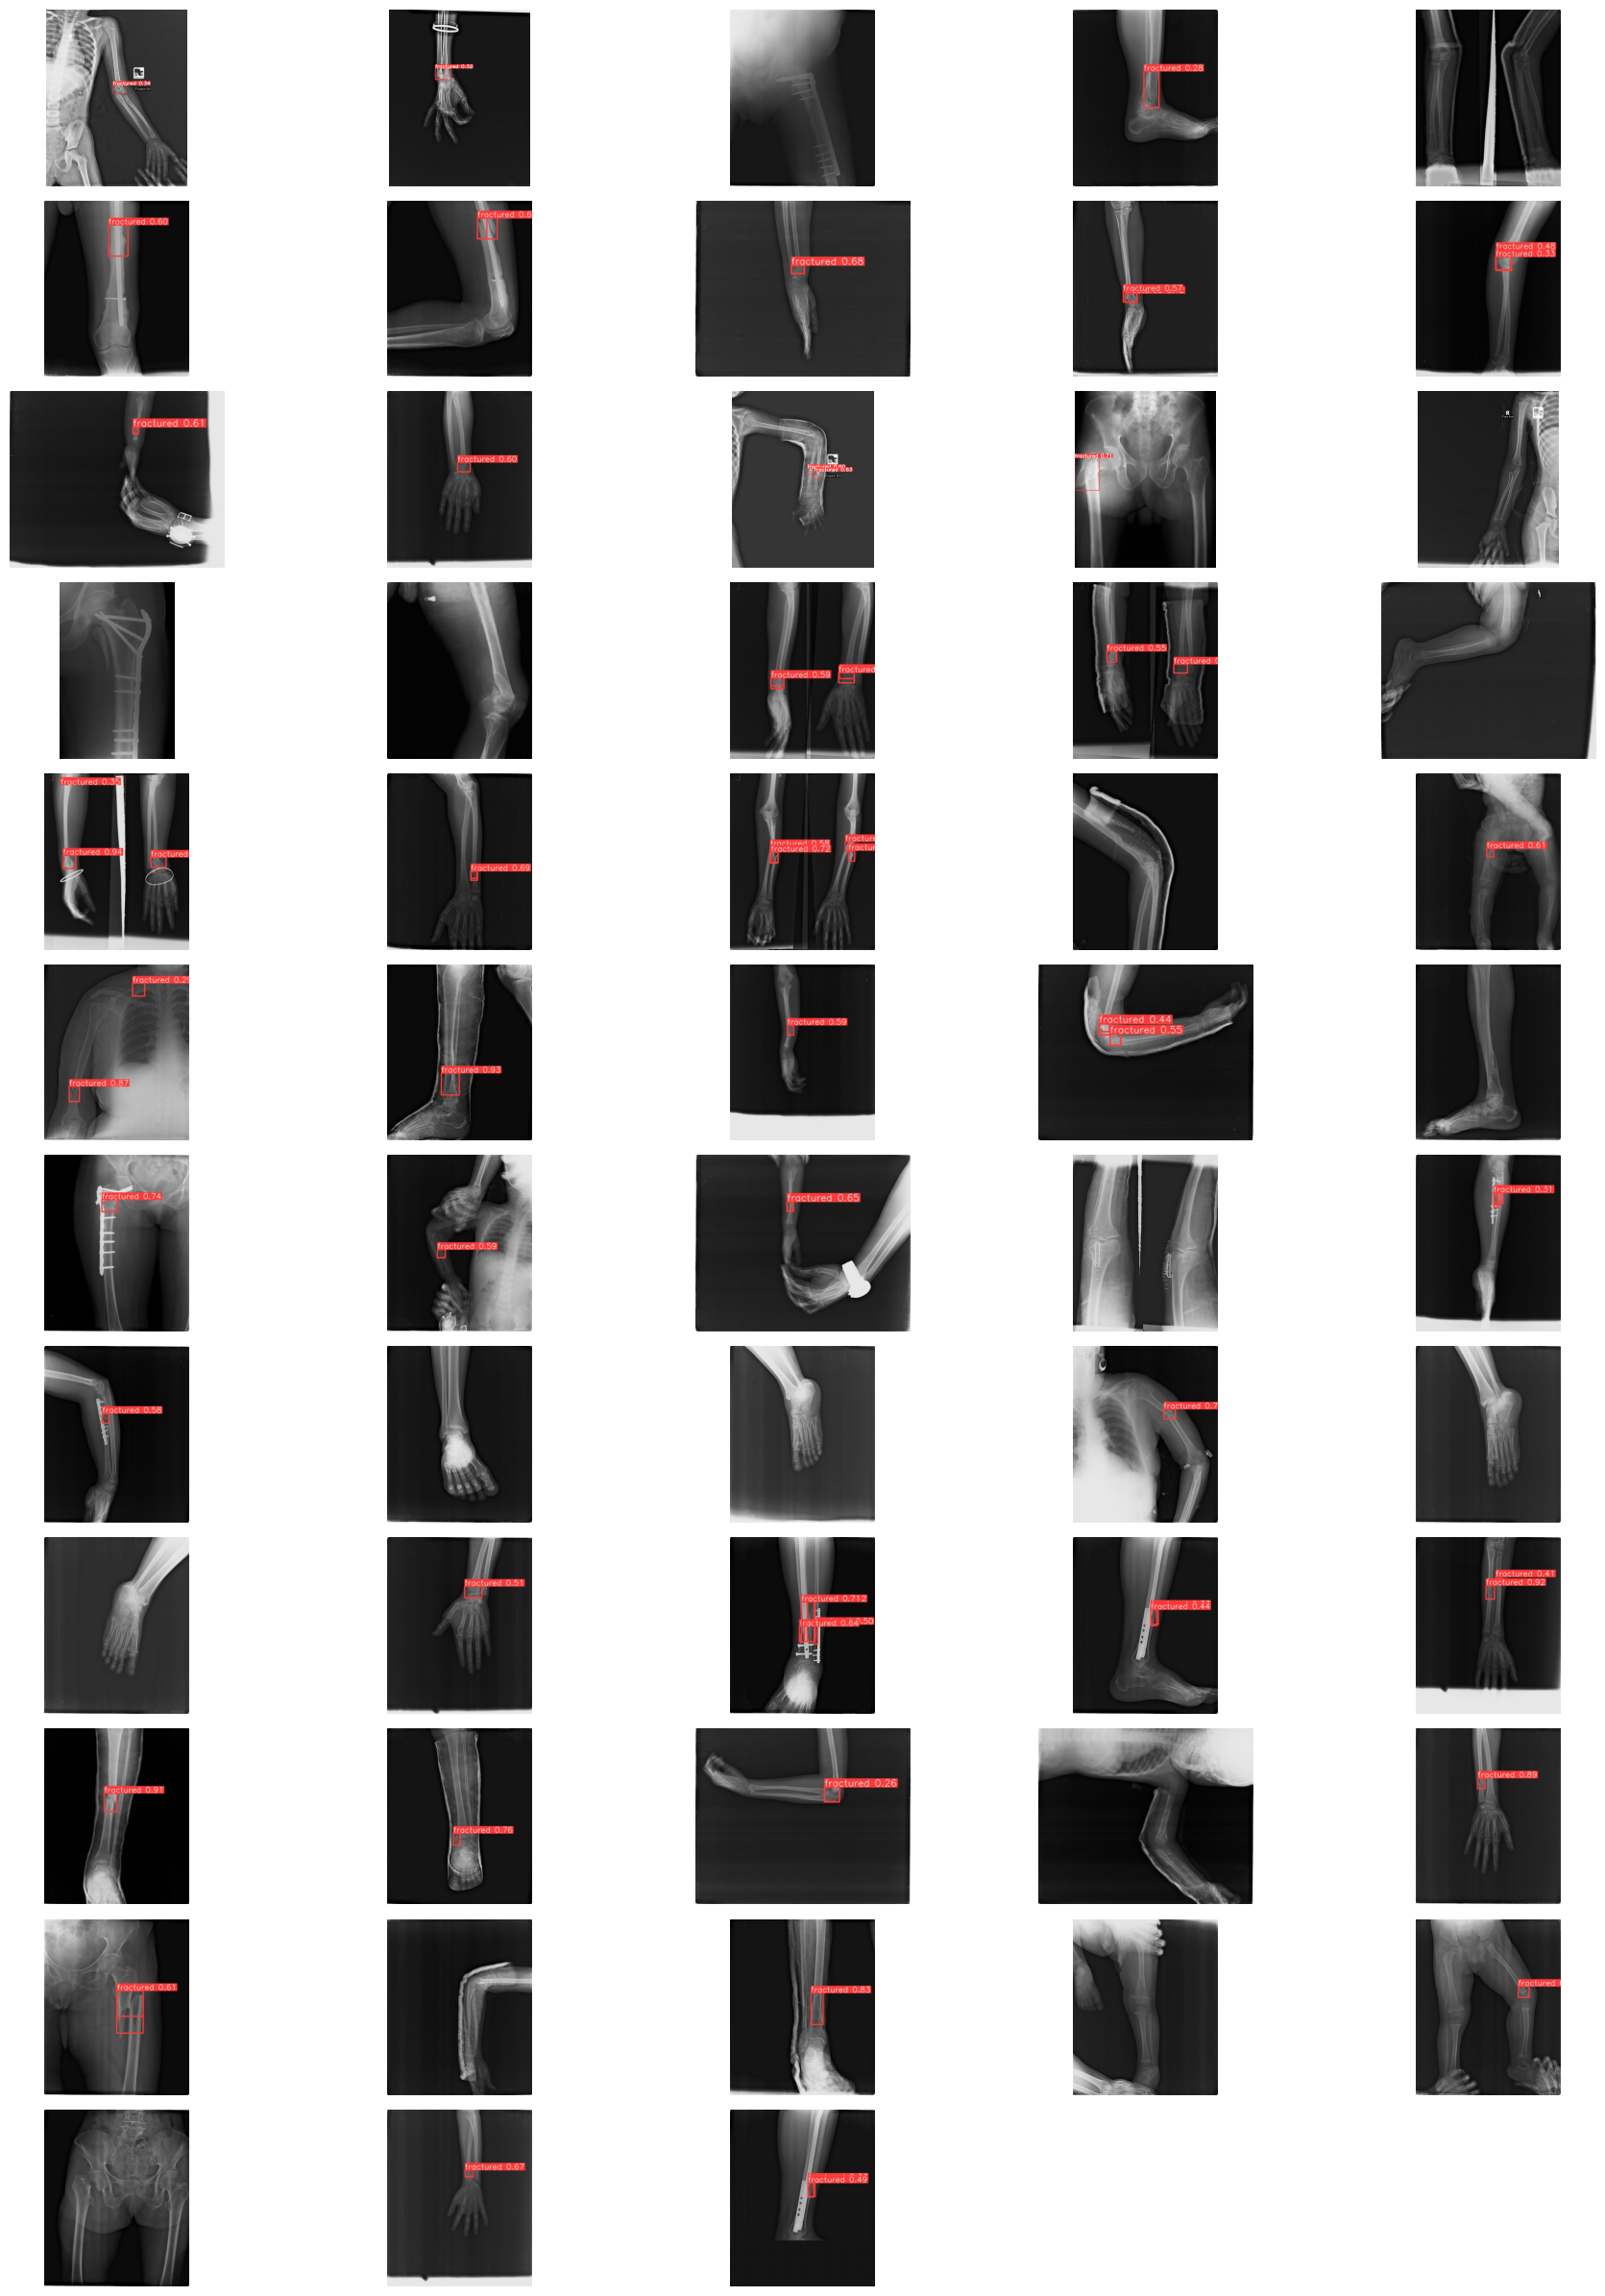

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

folder_path = '/content/drive/MyDrive/Thesis_2024/yolo/runs/detect/predict'

images = [os.path.join(folder_path, img) for img in os.listdir(folder_path)
          if img.endswith(".jpg")]

# Calculate number of rows and columns for a 12-row grid
num_images = len(images)
num_rows = 12
num_cols = (num_images + num_rows - 1) // num_rows  # Integer division for full rows

# Create a figure with appropriate figsize for better visualization
plt.figure(figsize=(18, 24))  # Adjust width and height for desired layout

# Display images in a 12-row grid
for i, image_path in enumerate(images):
    img = mpimg.imread(image_path)

    # Calculate row and column indices for grid placement
    row = i // num_cols
    col = i % num_cols

    # Create a subplot and display the image
    plt.subplot(num_rows, num_cols, i + 1)  # Start subplot indexing from 1
    plt.imshow(img)

    # Turn off axis labels for a cleaner presentation
    plt.axis('off')

plt.tight_layout()

plt.show()


### Validate detect model on test dataset

In [ ]:
!yolo task=detect mode=val save=True model='/content/drive/MyDrive/Thesis_2024/yolo/runs/detect/train/weights/last.pt' data=/content/drive/MyDrive/Thesis_2024/yolo/detect/data.yaml split = test

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/Thesis_2024/yolo/detect/labels/test.cache... 58 images, 0 backgrounds, 0 corrupt: 100% 58/58 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:04<00:00,  1.04s/it]
                   all         58         73      0.716      0.562      0.601      0.259
Speed: 7.5ms preprocess, 21.7ms inference, 0.0ms loss, 21.9ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=val save=True model='/content/drive/MyDrive/Thesis_2024/yolo/runs/detect/train/weights/best.pt' data=/content/drive/MyDrive/Thesis_2024/yolo/detect/data.yaml split = test

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/Thesis_2024/yolo/detect/labels/test.cache... 58 images, 0 backgrounds, 0 corrupt: 100% 58/58 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:04<00:00,  1.01s/it]
                   all         58         73      0.716      0.562      0.601      0.259
Speed: 6.8ms preprocess, 25.6ms inference, 0.0ms loss, 17.7ms postprocess per image
Results saved to runs/detect/val4
💡 Learn more at https://docs.ultralytics.com/modes/val


## SEGMENT

### Training yolov8n segmentation
I train this model by using yolov8n, 50 epochs and imgsz is 640

In [ ]:
!yolo task=segment mode=train model=yolov8n-seg.pt data=/content/drive/MyDrive/Thesis_2024/yolo/segment/data.yaml epochs=50 imgsz=640

100% 6.73M/6.73M [00:00<00:00, 95.3MB/s]
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/Thesis_2024/yolo/segment/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fal

### Validate segment model on val dataset

In [ ]:
!yolo task=segment mode=val model='/content/drive/MyDrive/Thesis_2024/yolo/runs/segment/train/weights/last.pt' data=/content/drive/MyDrive/Thesis_2024/yolo/segment/data.yaml split = val

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/drive/MyDrive/Thesis_2024/yolo/segment/labels/val.cache... 86 images, 0 backgrounds, 0 corrupt: 100% 86/86 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  83% 5/6 [00:05<00:01,  1.22s/it]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 6/6 [00:06<00:00,

In [ ]:
!yolo task=segment mode=val model='/content/drive/MyDrive/Thesis_2024/yolo/runs/segment/train/weights/best.pt' data=/content/drive/MyDrive/Thesis_2024/yolo/segment/data.yaml split = val

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/drive/MyDrive/Thesis_2024/yolo/segment/labels/val.cache... 86 images, 0 backgrounds, 0 corrupt: 100% 86/86 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  83% 5/6 [00:07<00:01,  1.32s/it]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 6/6 [00:08<00:00,

### Inference on test dataset

In [ ]:
!yolo task=segment mode=predict  model='/content/drive/MyDrive/Thesis_2024/yolo/runs/segment/train/weights/best.pt' conf=0.25 source="/content/drive/MyDrive/Thesis_2024/yolo/segment/images/test"

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
image 1/58 /content/drive/MyDrive/Thesis_2024/yolo/segment/images/test/IMG0000142.jpg: 640x512 (no detections), 79.0ms
image 2/58 /content/drive/MyDrive/Thesis_2024/yolo/segment/images/test/IMG0000207.jpg: 640x512 2 fractureds, 8.4ms
image 3/58 /content/drive/MyDrive/Thesis_2024/yolo/segment/images/test/IMG0000454.jpg: 640x544 (no detections), 78.9ms
image 4/58 /content/drive/MyDrive/Thesis_2024/yolo/segment/images/test/IMG0000480.jpg: 640x544 1 fractured, 9.1ms
im

### Plot result on test dataset

In [ ]:
folder_path = '/content/drive/MyDrive/Thesis_2024/yolo/runs/segment/predict'

images = [os.path.join(folder_path, img) for img in os.listdir(folder_path)
          if img.endswith(".jpg")]

# Calculate number of rows and columns for a 12-row grid
num_images = len(images)
num_rows = 12
num_cols = (num_images + num_rows - 1) // num_rows  # Integer division for full rows

# Create a figure with appropriate figsize for better visualization
plt.figure(figsize=(18, 24))  # Adjust width and height for desired layout

# Display images in a 12-row grid
for i, image_path in enumerate(images):
    img = mpimg.imread(image_path)

    # Calculate row and column indices for grid placement
    row = i // num_cols
    col = i % num_cols

    # Create a subplot and display the image
    plt.subplot(num_rows, num_cols, i + 1)  # Start subplot indexing from 1
    plt.imshow(img)

    plt.axis('off')

plt.tight_layout()

plt.show()


### Validate on test dataset

In [ ]:
!yolo task=segment mode=val model='/content/drive/MyDrive/Thesis_2024/yolo/runs/segment/train/weights/last.pt' data=/content/drive/MyDrive/Thesis_2024/yolo/segment/data.yaml split = test

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/drive/MyDrive/Thesis_2024/yolo/segment/labels/test.cache... 58 images, 0 backgrounds, 0 corrupt: 100% 58/58 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [00:04<00:00,  1.10s/it]
                   all         58         73      0.691       0.49      0.544      0.239      0.872      0.493      0.588      0.202
Speed: 6.3ms preprocess, 23.0ms inference, 0.0ms loss, 14.5ms postprocess per image
Results saved to runs/segment/val6
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=segment mode=val model='/content/drive/MyDrive/Thesis_2024/yolo/runs/segment/train/weights/best.pt' data=/content/drive/MyDrive/Thesis_2024/yolo/segment/data.yaml split = test

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/drive/MyDrive/Thesis_2024/yolo/segment/labels/test.cache... 58 images, 0 backgrounds, 0 corrupt: 100% 58/58 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [00:05<00:00,  1.27s/it]
                   all         58         73       0.64      0.493      0.561      0.218      0.711      0.505      0.536      0.175
Speed: 11.1ms preprocess, 27.4ms inference, 0.0ms loss, 12.7ms postprocess per image
Results saved to runs/segment/val4
💡 Learn more at https://docs.ultralytics.com/modes/val
